### Edge detection in image processing

1. First Order Derivative Methods
- Highlight the areas where the intensity of the image changes the most. 
- Achieved using gradient operators: Sobel and Prewitt operators.

**Sobel Operator Kernels:**
- Horizontal (Gx):
  $$
  S_x = \begin{bmatrix}
  -1 & 0 & 1 \\
  -2 & 0 & 2 \\
  -1 & 0 & 1
  \end{bmatrix}
  $$

- Vertical (Gy):
  $$
  S_y = \begin{bmatrix}
  -1 & -2 & -1 \\
  0 & 0 & 0 \\
  1 & 2 & 1
  \end{bmatrix}
  $$

**Procedure:**
1. Convolve the image with the Sobel kernels to get the gradients in the x and y directions.
2. Compute the gradient magnitude:
   $$
   G = \sqrt{G_x^2 + G_y^2}
   $$
   This gives the edge strength at each pixel.

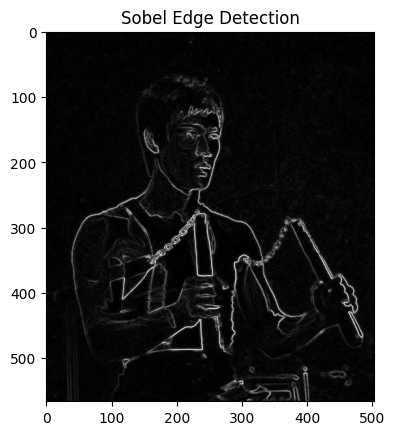

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('bruce.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel filters in both x and y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()

**Prewitt Operator Kernels:**
- Horizontal (Gx):  
  $$
  P_x = \begin{bmatrix}
  -1 & 0 & 1 \\
  -1 & 0 & 1 \\
  -1 & 0 & 1
  \end{bmatrix}
  $$
- Vertical (Gy):  
  $$
  P_y = \begin{bmatrix}
  -1 & -1 & -1 \\
  0 & 0 & 0 \\
  1 & 1 & 1
  \end{bmatrix}
  $$

**Procedure:**
1. Convolve the image with the Prewitt kernels.
2. Compute the gradient magnitude as in the Sobel operator.

567 567


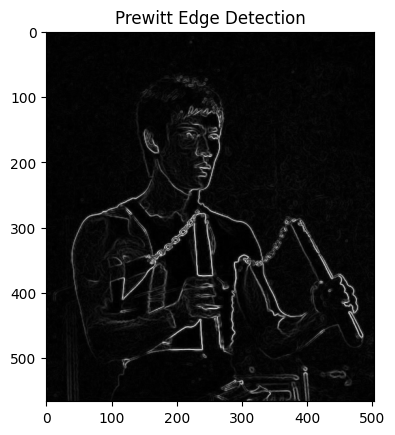

In [3]:
prewitt_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

print(len(prewitt_x), len(prewitt_y))
# Compute the gradient magnitude
gradient_magnitude_prewitt = cv2.magnitude(prewitt_x, prewitt_y)

# Display the result
plt.imshow(gradient_magnitude_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.show()

2. Second Order Derivative Methods
- Look for the changes in the rate of intensity change. Resulting in sharper images
- Achieved using Laplace of Gaussian (LoG) and Canny Edge Detector.

**Laplace of Gaussian (LoG) Procedure:**
1. Smooth the image with a Gaussian filter.
2. Apply the Laplacian operator to the smoothed image.
3. Zero-crossings in the Laplacian image indicate edges.

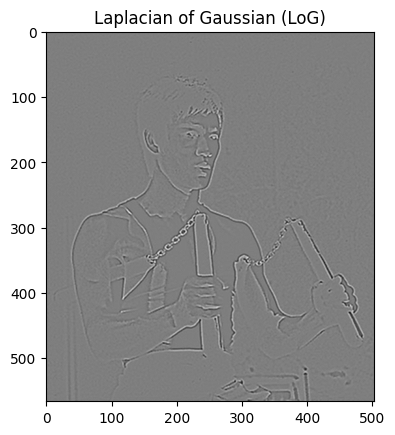

In [4]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian filter
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')
plt.show()

**Canny Edge Detector Procedure:**
1. Apply Gaussian smoothing to the image.
2. Find intensity gradients using Sobel filters.
3. Apply non-maximum suppression to thin the edges.
4. Perform edge tracking by hysteresis.

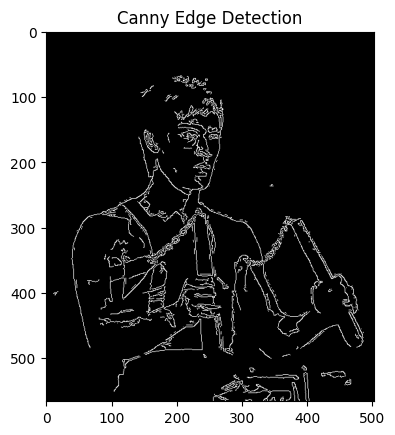

In [5]:
# Apply Canny edge detection
edges_canny = cv2.Canny(image, threshold1=100, threshold2=200)

plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

### Application: Background Removal

In [10]:
import cv2
import numpy as np
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('bruce.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def update_canny(threshold1, threshold2, blur_ksize):
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 0)
    
    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred, threshold1, threshold2)
    
    # Dilate the edges to create a more continuous mask
    kernel = np.ones((5,5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=2)
    
    # Find contours from the edges
    contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a blank mask
    mask = np.zeros_like(image)
    
    # Draw filled contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    
    # Apply the mask to the original image
    result = cv2.bitwise_and(image, mask)
    
    # Create a transparent (alpha) channel
    result_with_alpha = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
    result_with_alpha[:, :, 3] = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    
    # Display the result
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edges")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result_with_alpha, cv2.COLOR_BGRA2RGBA))
    plt.title("Objects with Empty Background")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

interact(update_canny, 
         threshold1=IntSlider(min=0, max=255, step=1, value=11, description='Threshold1'),
         threshold2=IntSlider(min=0, max=255, step=1, value=198, description='Threshold2'),
         blur_ksize=IntSlider(min=1, max=31, step=2, value=3, description='Blur Kernel Size'))

interactive(children=(IntSlider(value=11, description='Threshold1', max=255), IntSlider(value=198, description…

<function __main__.update_canny(threshold1, threshold2, blur_ksize)>